Dataset Preview:
  Show_Id Category  Title           Director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7.19  Jorge Michel Grau   
2      s3    Movie  23.59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                Cast        Country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

        Release_Date Rating   Duration  \
0    August 14, 2020  TV-MA  4 Seasons   
1  December 23, 2016  TV-MA     93 min   
2  December 20, 2018      R     78 min   
3  November 16, 2017  PG-13     80 min   
4    January 1, 2020  PG-13    123 min   

              

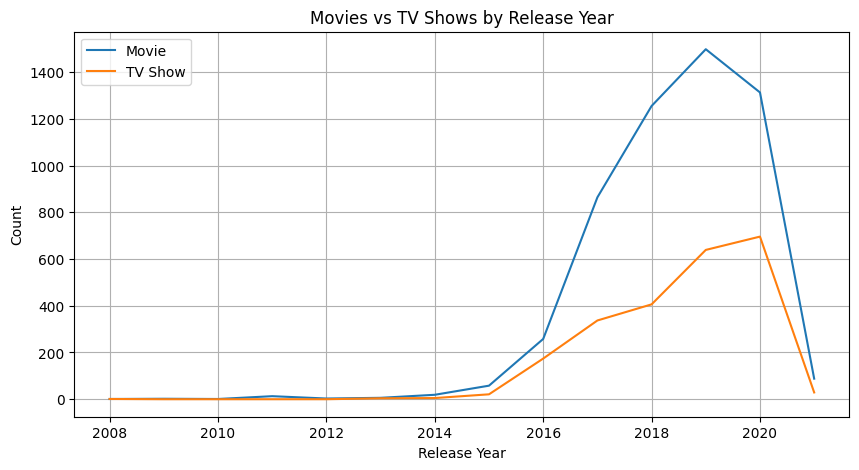

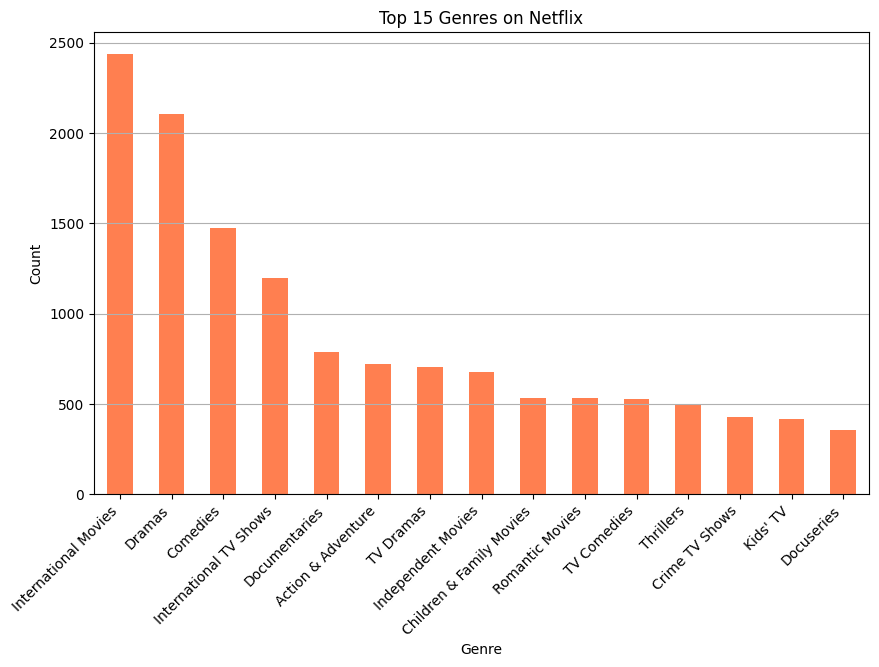

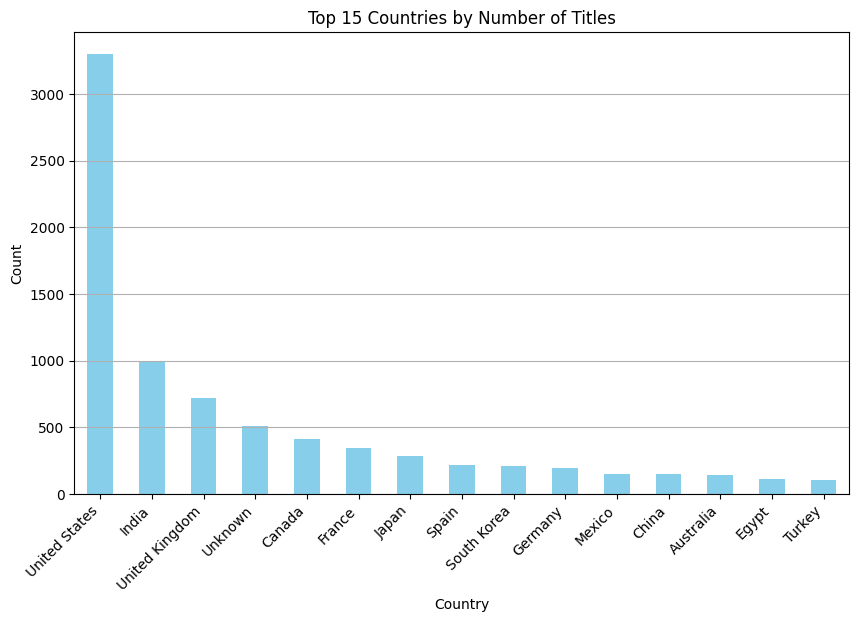


Movies vs TV Shows by Year (Last 10 Years):
category      Movie  TV Show
release_year                
2012.0            3        0
2013.0            6        4
2014.0           19        5
2015.0           58       21
2016.0          258      174
2017.0          864      337
2018.0         1255      406
2019.0         1498      639
2020.0         1313      696
2021.0           88       29

Top 15 Genres:
genres
International Movies        2437
Dramas                      2108
Comedies                    1472
International TV Shows      1199
Documentaries                786
Action & Adventure           721
TV Dramas                    704
Independent Movies           675
Children & Family Movies     532
Romantic Movies              531
TV Comedies                  525
Thrillers                    492
Crime TV Shows               427
Kids' TV                     414
Docuseries                   353
Name: count, dtype: int64

Top 15 Countries:
country
United States     3298
India        

In [6]:


# 1️⃣ Import Libraries
import pandas as pd
import matplotlib.pyplot as plt

# 2️⃣ Load Dataset
df = pd.read_csv("/content/Netflix Dataset (4).csv")

# Show first few rows
print("Dataset Preview:")
print(df.head())
print("\nColumns:", df.columns.tolist())

# 3️⃣ Clean and Prepare Data
df.columns = [c.strip().lower().replace(" ", "_") for c in df.columns]

# Extract release year from 'release_date' column
df['release_year'] = pd.to_datetime(df['release_date'], errors='coerce').dt.year

# Clean release_year (remove invalid years)
df['release_year'] = pd.to_numeric(df['release_year'], errors='coerce')
df.loc[(df['release_year'] < 1900) | (df['release_year'] > 2030), 'release_year'] = pd.NA

# Fill missing values for country and type
df['country'] = df['country'].fillna('Unknown')
df['category'] = df['category'].fillna('Unknown')

# Extract genres properly from 'type' column (which contains comma-separated genres)
df['genres'] = df['type'].fillna('')

# 4️⃣ ANALYSIS

# ---- Movies vs TV Shows by Release Year ----
type_year = (
    df.dropna(subset=['release_year'])
    .groupby(['release_year', 'category'])
    .size()
    .unstack(fill_value=0)
    .sort_index()
)

# ---- Top Genres ----
genres_series = (
    df['genres']
    .str.split(',', expand=False)
    .explode()
    .dropna()
    .str.strip()
)
top_genres = genres_series.value_counts().head(15)

# ---- Top Countries ----
countries_series = (
    df['country']
    .str.split(',', expand=False)
    .explode()
    .dropna()
    .str.strip()
)
top_countries = countries_series.value_counts().head(15)

# 5️⃣ VISUALIZATION

# Plot 1: Movies vs TV Shows over the Years
plt.figure(figsize=(10,5))
for col in type_year.columns:
    plt.plot(type_year.index, type_year[col], label=col)
plt.title("Movies vs TV Shows by Release Year")
plt.xlabel("Release Year")
plt.ylabel("Count")
plt.legend()
plt.grid(True)
plt.show()

# Plot 2: Top Genres
plt.figure(figsize=(10,6))
top_genres.plot(kind='bar', color='coral')
plt.title("Top 15 Genres on Netflix")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()

# Plot 3: Top Countries
plt.figure(figsize=(10,6))
top_countries.plot(kind='bar', color='skyblue')
plt.title("Top 15 Countries by Number of Titles")
plt.xlabel("Country")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()

# 6️⃣ Summary Outputs
print("\nMovies vs TV Shows by Year (Last 10 Years):")
print(type_year.tail(10))

print("\nTop 15 Genres:")
print(top_genres)

print("\nTop 15 Countries:")
print(top_countries)

# 7️⃣ Insights Summary
print("\n🔍 INSIGHTS SUMMARY:")
print("1. Netflix has produced more Movies compared to TV Shows over the years.")
print("2. Drama, Comedy, and Action genres dominate Netflix’s library.")
print("3. The United States, India, and the UK are the top contributors of Netflix content.")
print("4. Netflix’s content library has grown rapidly after 2015, with steady growth of both Movies and TV Shows.")


**understandings:**

### 📊 **1. Movies vs TV Shows by Release Year**

This graph shows how Netflix’s content has evolved over time.
It highlights that **Movies consistently dominate** over TV Shows, though the number of **TV Shows has increased after 2015**, indicating Netflix’s growing focus on series content.

---

### 🎭 **2. Top 15 Genres on Netflix**

This bar chart represents the most frequent genres available on Netflix.
**Drama, Comedy, and Action** are the most popular genres, showing that Netflix focuses heavily on emotionally engaging and entertaining content across different audiences.

---

### 🌍 **3. Top 15 Countries by Number of Titles**

This chart shows which countries contribute the most to Netflix’s catalog.
The **United States leads by a large margin**, followed by **India** and the **United Kingdom**, showing Netflix’s strong presence in both Western and Asian markets.

---

### 💡 **Overall Insights Summary**

Netflix’s library is dominated by Movies but has seen strong growth in TV Shows in recent years.
Dramas and Comedies are core genres, appealing to a wide range of viewers.
The U.S. remains the main content provider, with India and the U.K. emerging as major contributors — showing Netflix’s focus on global expansion.

---




# Strategic Recommendations for Netflix

- **Increase Investment in TV Shows & Original Series**  
  As the analysis shows a rising trend in TV Shows after 2015, Netflix should continue expanding its original series library — especially in genres like Drama, Thriller, and Action, which attract long-term subscribers.

- **Focus on Regional Content Expansion**  
  With strong contributions from the U.S., India, and the U.K., Netflix should target emerging markets such as South Korea, Spain, and Japan, where unique storytelling and global audience appeal are growing rapidly.

- **Diversify Genre Portfolio**  
  While Drama and Comedy dominate, Netflix can explore underrepresented genres like Documentaries, Animation, and Sci-Fi, which have high potential for niche audiences and critical acclaim.

- **Encourage More Local Productions**  
  By promoting country-specific originals and collaborating with regional filmmakers, Netflix can strengthen local engagement and increase subscriptions in non-English-speaking regions.

- **Leverage Data-Driven Recommendations**  
  Using content trend analysis and viewer data, Netflix can personalize suggestions and predict future content success, ensuring maximum engagement and retention.
